In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
# warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/bigdata/airbnb/

/content/drive/MyDrive/Colab Notebooks/bigdata/airbnb


## import data
* df_all: train_x + validation_x
* df_all_y: train_y + validation_y
* df_test: test_x (預測結果要上傳結果到kaggle)

In [ ]:
df_all = pd.read_csv('data/train_users_2.csv')
df_all = df_all.fillna(-1)
df_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,-1,-unknown-,-1.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,-1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
df_all.shape

(213451, 16)

In [ ]:
df_all.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [ ]:
df_all_y = df_all['country_destination']
df_all = df_all.drop(['id', 'date_first_booking', 'country_destination'], axis = 1)

In [ ]:
df_all.isnull().sum()

date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
dtype: int64

## 轉換格式

In [ ]:
#Converting below columns as categories for plotting in graphs
categorical_features = ['affiliate_channel',
             'affiliate_provider',
             'first_affiliate_tracked',
             'first_browser',
             'first_device_type',
             'gender',
             'language',
             'signup_app',
             'signup_method',
             'signup_flow']

for i in categorical_features:
    df_all[i] = df_all[i].astype('category')

In [ ]:
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')

## 資料探索

In [ ]:
sns.set_style('whitegrid')
sns.set_context("talk")

* gender分布

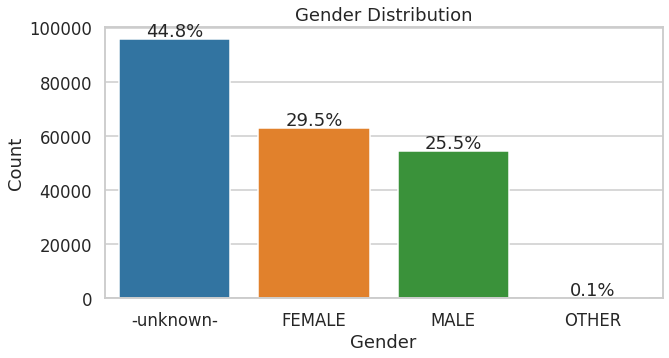

In [ ]:
plt.figure(figsize=(10,5))
order1 = df_all['gender'].value_counts().index
sns.countplot(data = df_all, x = 'gender', order = order1)
# , color = sns.color_palette()[0]
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
order2 = df_all['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

* 帳號創建年份分布

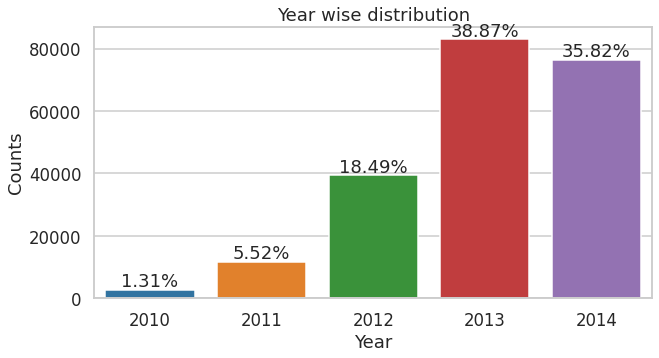

In [ ]:
#Extracting year for date_account_created
df_all['acc_year'] = df_all['date_account_created'].dt.year

df1 = df_all.groupby('acc_year').count()
df1.head()

years = [2010,2011,2012,2013,2014]
yearsOrder=pd.api.types.CategoricalDtype(ordered=True, categories=years)
df1.reset_index(inplace = True)
df1.acc_year = df1.acc_year.astype(yearsOrder)

plt.figure(figsize=[10, 5])
sns.barplot(data=df1,x='acc_year',y='affiliate_provider');
# ,color=sns.color_palette()[2]
plt.title('Year wise distribution');
plt.xlabel('Year')
plt.ylabel('Counts')
for i in range(df1.shape[0]):
    count=df1.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

* 2013年看起來最多人創建帳號, 所以看一下當年創建帳號的月份分布

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


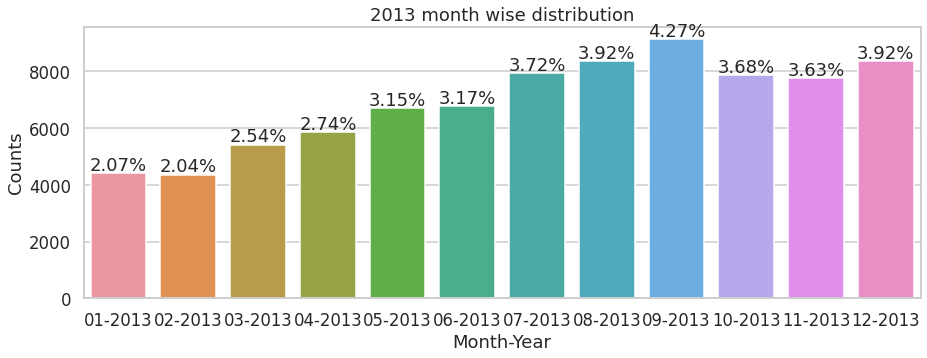

In [ ]:
# 2013
df2 = df_all[df_all['date_account_created'].dt.year==2013]
df2['monthYear13'] = df2['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
df2 = df2.groupby('monthYear13').count()

plt.figure(figsize=[15,5])
sns.barplot(data=df2,x=df2.index,y='affiliate_provider');
# ,color=sns.color_palette()[3]
plt.title('2013 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
for i in range(df2.shape[0]):
    count=df2.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

* age

In [ ]:
df_all.sort_values('age', ascending = False)[df_all['age'] > 100][['age', '']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,member_age_bins
68401,2013-04-01,2013-04-01 19:23:48,MALE,2014.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
40923,2012-09-14,2012-09-14 17:23:48,FEMALE,2014.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,NaN
77910,2013-05-18,2013-05-18 20:31:23,FEMALE,2014.0,facebook,21,en,sem-brand,google,untracked,Web,iPhone,Mobile Safari,NaN
145056,2014-01-23,2014-01-23 05:05:39,FEMALE,2014.0,basic,0,en,direct,direct,untracked,Web,iPad,Chrome Mobile,NaN
43024,2012-09-30,2012-09-30 20:27:03,FEMALE,2014.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Safari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,2012-05-09,2012-05-09 02:45:00,MALE,101.0,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,NaN
14821,2012-01-05,2012-01-05 23:30:08,FEMALE,101.0,facebook,2,en,direct,direct,untracked,Web,Mac Desktop,Safari,NaN
160710,2014-03-08,2014-03-08 02:50:37,FEMALE,101.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NaN
1615,2010-09-04,2010-09-04 21:06:38,FEMALE,101.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN


In [ ]:
df_all['member_age_bins']=df_all['age'].apply(lambda x: '18 - 20' if 18<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60-70' if 60<x<=70
                                                  else '70+' if 70<x<=100
                                                  else np.nan)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


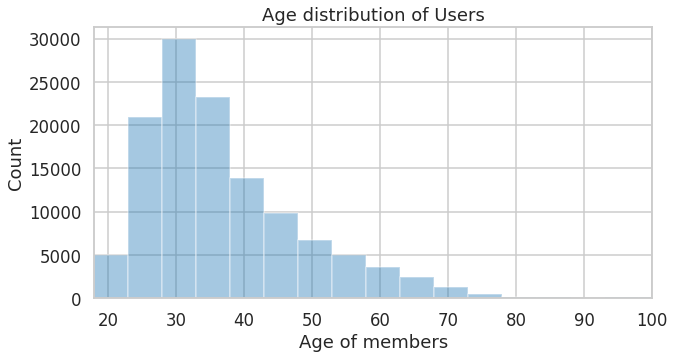

In [ ]:
#Plotting Age distribution of the members
plt.figure(figsize=[10,5])
sns.distplot(df_all.age.dropna(),bins=np.arange(18,100+5,5),kde=False);
# ,color=sns.color_palette()[5]
plt.xlabel('Age of members')
plt.ylabel('Count')
plt.title('Age distribution of Users')
plt.xlim(18,100);

* 目的地國家(預測目標y)分布

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


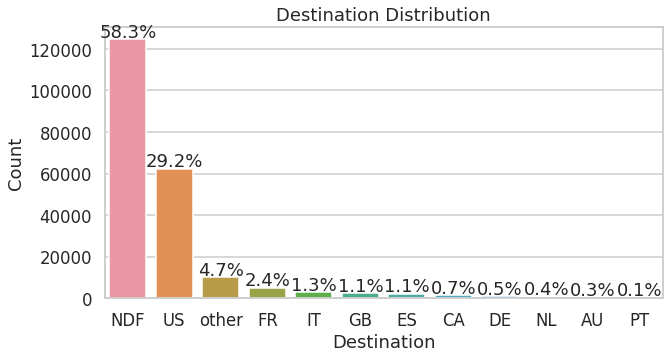

In [ ]:
plt.figure(figsize=(10,5))
order1 = df_all_y.value_counts().index
sns.countplot(df_all_y, order = order1)
# , color = sns.color_palette()[1]
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = df_all_y.value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / len(df_all_y))
    plt.text(i,count+1000,strt,ha='center')
plt.show()

* 年齡對預測目標(目的地國家)的關係

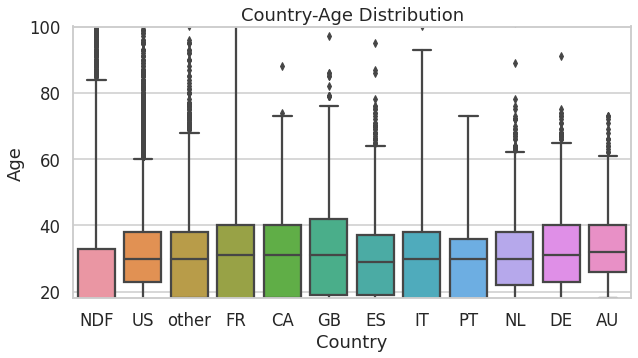

In [ ]:
plt.figure(figsize=[10,5])
sns.boxplot(y=df_all['age'],x=df_all_y);
# ,color=sns.color_palette()[6]
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

* 性別對預測目標(目的地國家)的關係

Text(0.5, 1.0, 'Gender-Destination Distribution')

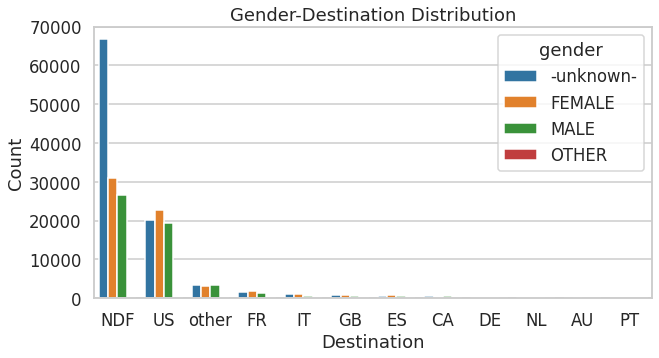

In [ ]:
plt.figure(figsize=(10,5))
order1 = df_all_y.value_counts().index
sns.countplot(data = df_all, x = df_all_y, order = order1, hue='gender')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')
# order2 = df_train['country_destination'].value_counts()

## 前處理和特徵工程:

* 對train_x, validaition_x, test_x填補遺漏值(填-1)

In [ ]:
dfWork = pd.concat((df_all, df_test), axis=0, ignore_index=True)
dfWork = dfWork.drop(['id', 'date_first_booking'], axis=1)
Filling nan
dfWork = dfWork.fillna(-1)

In [ ]:
dfWork.shape

(213451, 13)

* 對train_x, validation_x, test_x的**date_account_created**作處理


> 切開年份、月份，各自當獨立的變數，(因考慮月份和年份會對旅行目的地有影響)




In [ ]:
# dac = pd.DataFrame(np.vstack(dfWork['date_account_created'].astype(str).str.replace(' 00:00:00', '')))
dac = np.vstack(dfWork.date_account_created.astype(str).str.replace(' 00:00:00', '').apply(lambda x: list(map(int, x.split('-')))).values)
dfWork['dac_year'] = dac[:,0]
dfWork['dac_month'] = dac[:,1]
dfWork = dfWork.drop(['date_account_created'], axis=1)

In [ ]:
dfWork.shape

(275547, 16)

In [ ]:
dfWork[['dac_year', 'dac_month']].head()

,dac_year,dac_month
0,2010,6
1,2011,5
2,2010,9
3,2011,12
4,2010,9


* 對train_x, validation_x, test_x的**timestamp_first_active**作處理


> 切開年份、月份，各自當獨立的變數，(因考慮月份和年份會對旅行目的地有影響)




In [ ]:
# train_x, validation_x
tfa1 = np.vstack(df_all.timestamp_first_active.astype(str).str[:10].apply(lambda x: list(map(int, x.split('-')))).values)

# test_x(資料格式跟上面的不一樣所以分開處理)
tfa2 = np.vstack(df_test.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)

In [ ]:
dfWork['tfa_year'] = list(tfa1[:, 0]) + list(tfa2[:, 0])
dfWork['tfa_month'] = list(tfa1[:, 1]) + list(tfa2[:, 1])
dfWork = dfWork.drop(['timestamp_first_active'], axis=1)

In [ ]:
dfWork.shape

(275547, 17)

In [ ]:
dfWork[['tfa_year', 'tfa_month']].head()

,tfa_year,tfa_month
0,2009,3
1,2009,5
2,2009,6
3,2009,10
4,2009,12


* 處理年齡離群值(小於10歲和大於100歲的改成-1)

In [ ]:
av = dfWork.age.values
dfWork['age'] = np.where(np.logical_or(av<10, av>100), -1, av)

* onehot

In [ ]:
dfWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   275547 non-null  object 
 1   age                      275547 non-null  float64
 2   signup_method            275547 non-null  object 
 3   signup_flow              275547 non-null  int64  
 4   language                 275547 non-null  object 
 5   affiliate_channel        275547 non-null  object 
 6   affiliate_provider       275547 non-null  object 
 7   first_affiliate_tracked  275547 non-null  object 
 8   signup_app               275547 non-null  object 
 9   first_device_type        275547 non-null  object 
 10  first_browser            275547 non-null  object 
 11  acc_year                 275547 non-null  float64
 12  member_age_bins          275547 non-null  object 
 13  dac_year                 275547 non-null  int64  
 14  dac_

In [ ]:
cate = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel',
             'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in cate:
    print(f, '共有', dfWork[f].value_counts().shape[0], '類')

gender 共有 4 類
signup_method 共有 4 類
signup_flow 共有 18 類
language 共有 26 類
affiliate_channel 共有 8 類
affiliate_provider 共有 18 類
first_affiliate_tracked 共有 8 類
signup_app 共有 4 類
first_device_type 共有 9 類
first_browser 共有 55 類


* first browser很多類都只有一個 所以把稀有程度前25高的類別一律改成'other'

In [ ]:
dfWork['first_browser'].value_counts().sort_values(0)[:25]

PS Vita browser         1
IBrowse                 1
Epic                    1
Googlebot               1
NetNewsWire             1
Nintendo Browser        1
Arora                   1
Palm Pre web browser    1
Stainless               1
UC Browser              1
Google Earth            1
Outlook 2007            1
IceDragon               1
Conkeror                1
Kindle Browser          1
TheWorld Browser        2
OmniWeb                 2
Flock                   2
Comodo Dragon           2
SlimBrowser             2
Crazy Browser           2
Mozilla                 3
Opera Mobile            4
Avant Browser           4
CoolNovo                6
Name: first_browser, dtype: int64

In [ ]:
rare_browser = dfWork['first_browser'].value_counts().index[30:]
for i, v in enumerate(dfWork['first_browser']):
   if v in rare_browser:
     dfWork['first_browser'][i] = 'other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dfWork.columns
dfWork = dfWork.drop('member_age_bins', axis = 1)

In [ ]:
onehot = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel',  
      'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in onehot:
    dfWork_dummy = pd.get_dummies(dfWork[f], prefix=f)
    dfWork = dfWork.drop([f], axis=1)
    dfWork = pd.concat((dfWork, dfWork_dummy), axis=1)

* 對預測目標(目的地國家)編碼

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labeled_y = le.fit_transform(df_all_y)

In [ ]:
# 原始資料
df_all_y.head(5)

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [ ]:
# 編碼後
labeled_y[:5]

array([ 7,  7, 10, 11, 10])

* split train, validation data

In [ ]:
test_x = dfWork.values[df_all.shape[0]:]
dfWork_cut = dfWork[:df_all.shape[0]] # 把test_x拿出來後 要剪掉

In [ ]:
from sklearn.model_selection import train_test_split
train_x, validation_x, train_y, validation_y = train_test_split(dfWork_cut, labeled_y, test_size=0.3, random_state= 1, shuffle = True)

In [ ]:
print('訓練資料(70%)筆數: ', train_x.shape[0])
print('驗證資料(30%)筆數: ', validation_x.shape[0])
print('測試資料筆數: ', test_x.shape[0])

訓練資料(70%)筆數:  149415
驗證資料(30%)筆數:  64036
測試資料筆數:  62096
